<div class="markdown-google-sans">
  <h2>Mi az a Colab?</h2>
</div>

A Colab, vagyis „Colaboratory” segítségével Python-kódot írhat és futtathat böngészőjében, a következő előnyökkel:
- Nincs szükség konfigurációra
- Díjmentes GPU-hozzáférés
- Egyszerű megosztás

Legyen Ön <strong>hallgató</strong>, <strong>adattudós</strong> vagy <strong>AI-kutató</strong>, a Colab megkönnyítheti a munkáját. Nézze meg a <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colabot bemutató videót</a>, amelyben további információkat találhat, vagy csak vágjon bele alább!

# Resilient IT


In [46]:
import pandas as pd
df = pd.read_csv('/content/exportgbiall01_05_5.csv', sep = ";")
#df

In [ ]:
pip install pm4py

In [ ]:
import pm4py
log = pm4py.format_dataframe(df, case_id='Case id',activity_key ='Activity',
                             timestamp_key='Timestamp')
log["time:timestamp"] = pd.to_datetime(df.Timestamp)
log

In [92]:
logcost = pd.read_csv('/content/exportgbiall01_05_6.csv',sep=";",names = ['time:timestamp','org:resource','case:concept:name','concept:name','transaction','cost'],usecols = [0,1,2,3,4,5])
logcost

,time:timestamp,org:resource,case:concept:name,concept:name,transaction,cost
0,2025.03.11 10:04,GBIALL-001,1,FB02,Change Document,3
1,2025.03.11 10:20,GBIALL-001,1,FB08,Reverse Document,63
2,2025.03.11 10:28,GBIALL-001,1,FK01,Create Vendor (Accounting),25
3,2025.03.11 10:38,GBIALL-001,1,FK02,Change Vendor (Accounting),65
4,2025.03.11 10:43,GBIALL-001,1,FB60,Enter Incoming Invoices,185
5,2025.03.11 10:49,GBIALL-001,1,FK10N,Vendor Balance Display,10
6,2025.03.11 10:55,GBIALL-001,1,F-53,Post Outgoing Payments,130
7,2025.03.11 11:00,GBIALL-001,1,FB60,Enter Incoming Invoices,185
8,2025.03.11 11:01,GBIALL-001,1,FB08,Reverse Document,63
9,2025.03.11 11:08,GBIALL-001,1,FB60,Enter Incoming Invoices,185


filtered_dataframe = pm4py.filter_trace_attribute_values(
    log,
    'User',
    ['GBIALL-001'],
    case_id_key='case:concept:name'
)
filtered_dataframe

In [ ]:

for variant, subdf in pm4py.split_by_process_variant(log):
    #print(variant)  # The definition of that particular variant
    print(subdf)   ## the sub-dataframe (only that particular variant)
    subdf.to_csv('out.csv')
    print(f"There are {len(subdf)} of the the variant \t {variant}")


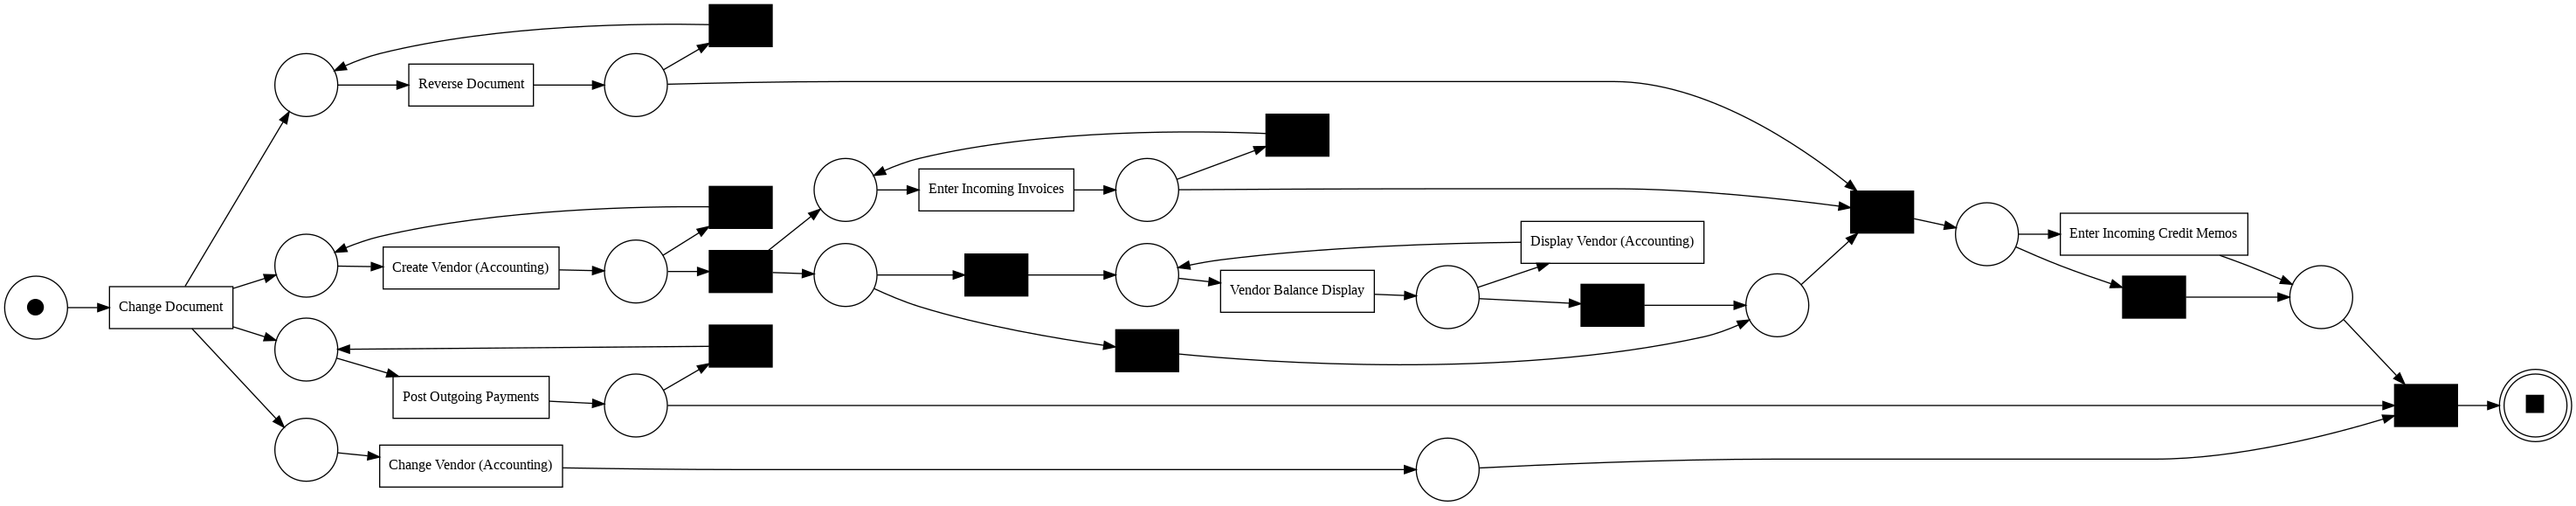

In [49]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

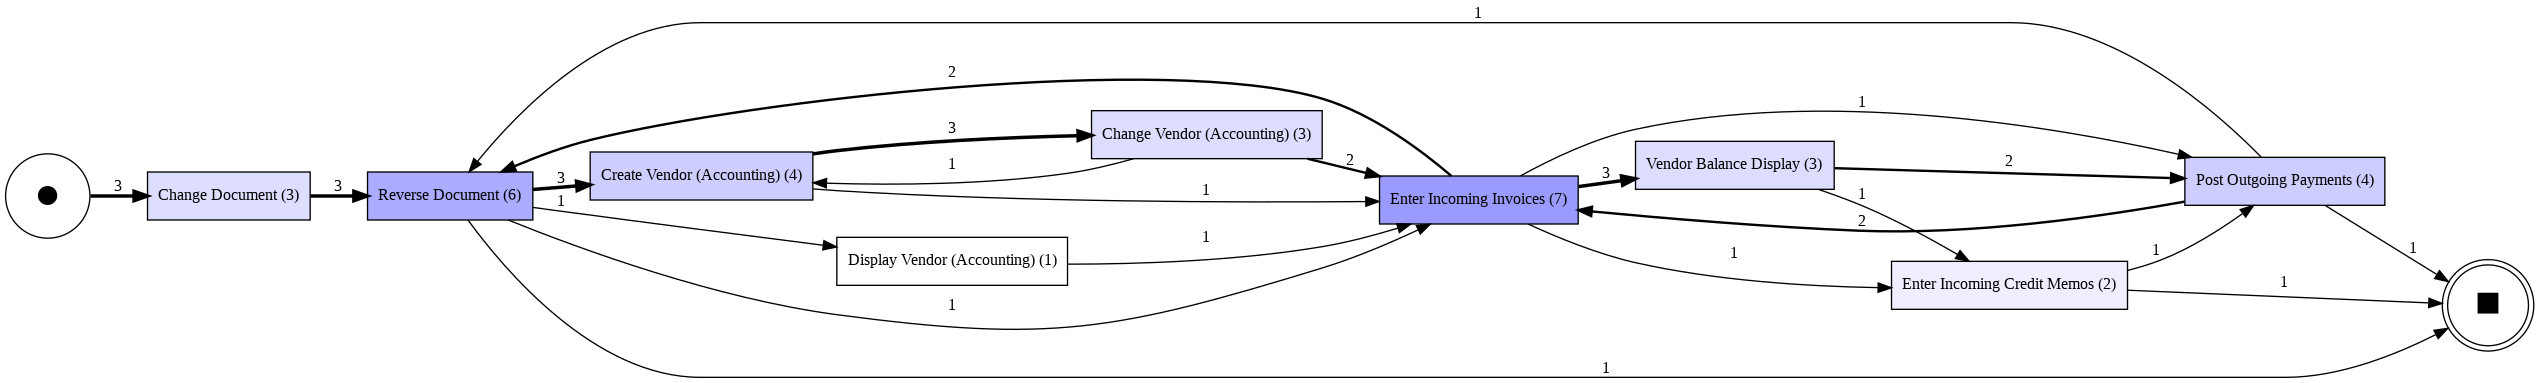

In [50]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_dfg(dfg, start_activities, end_activities)

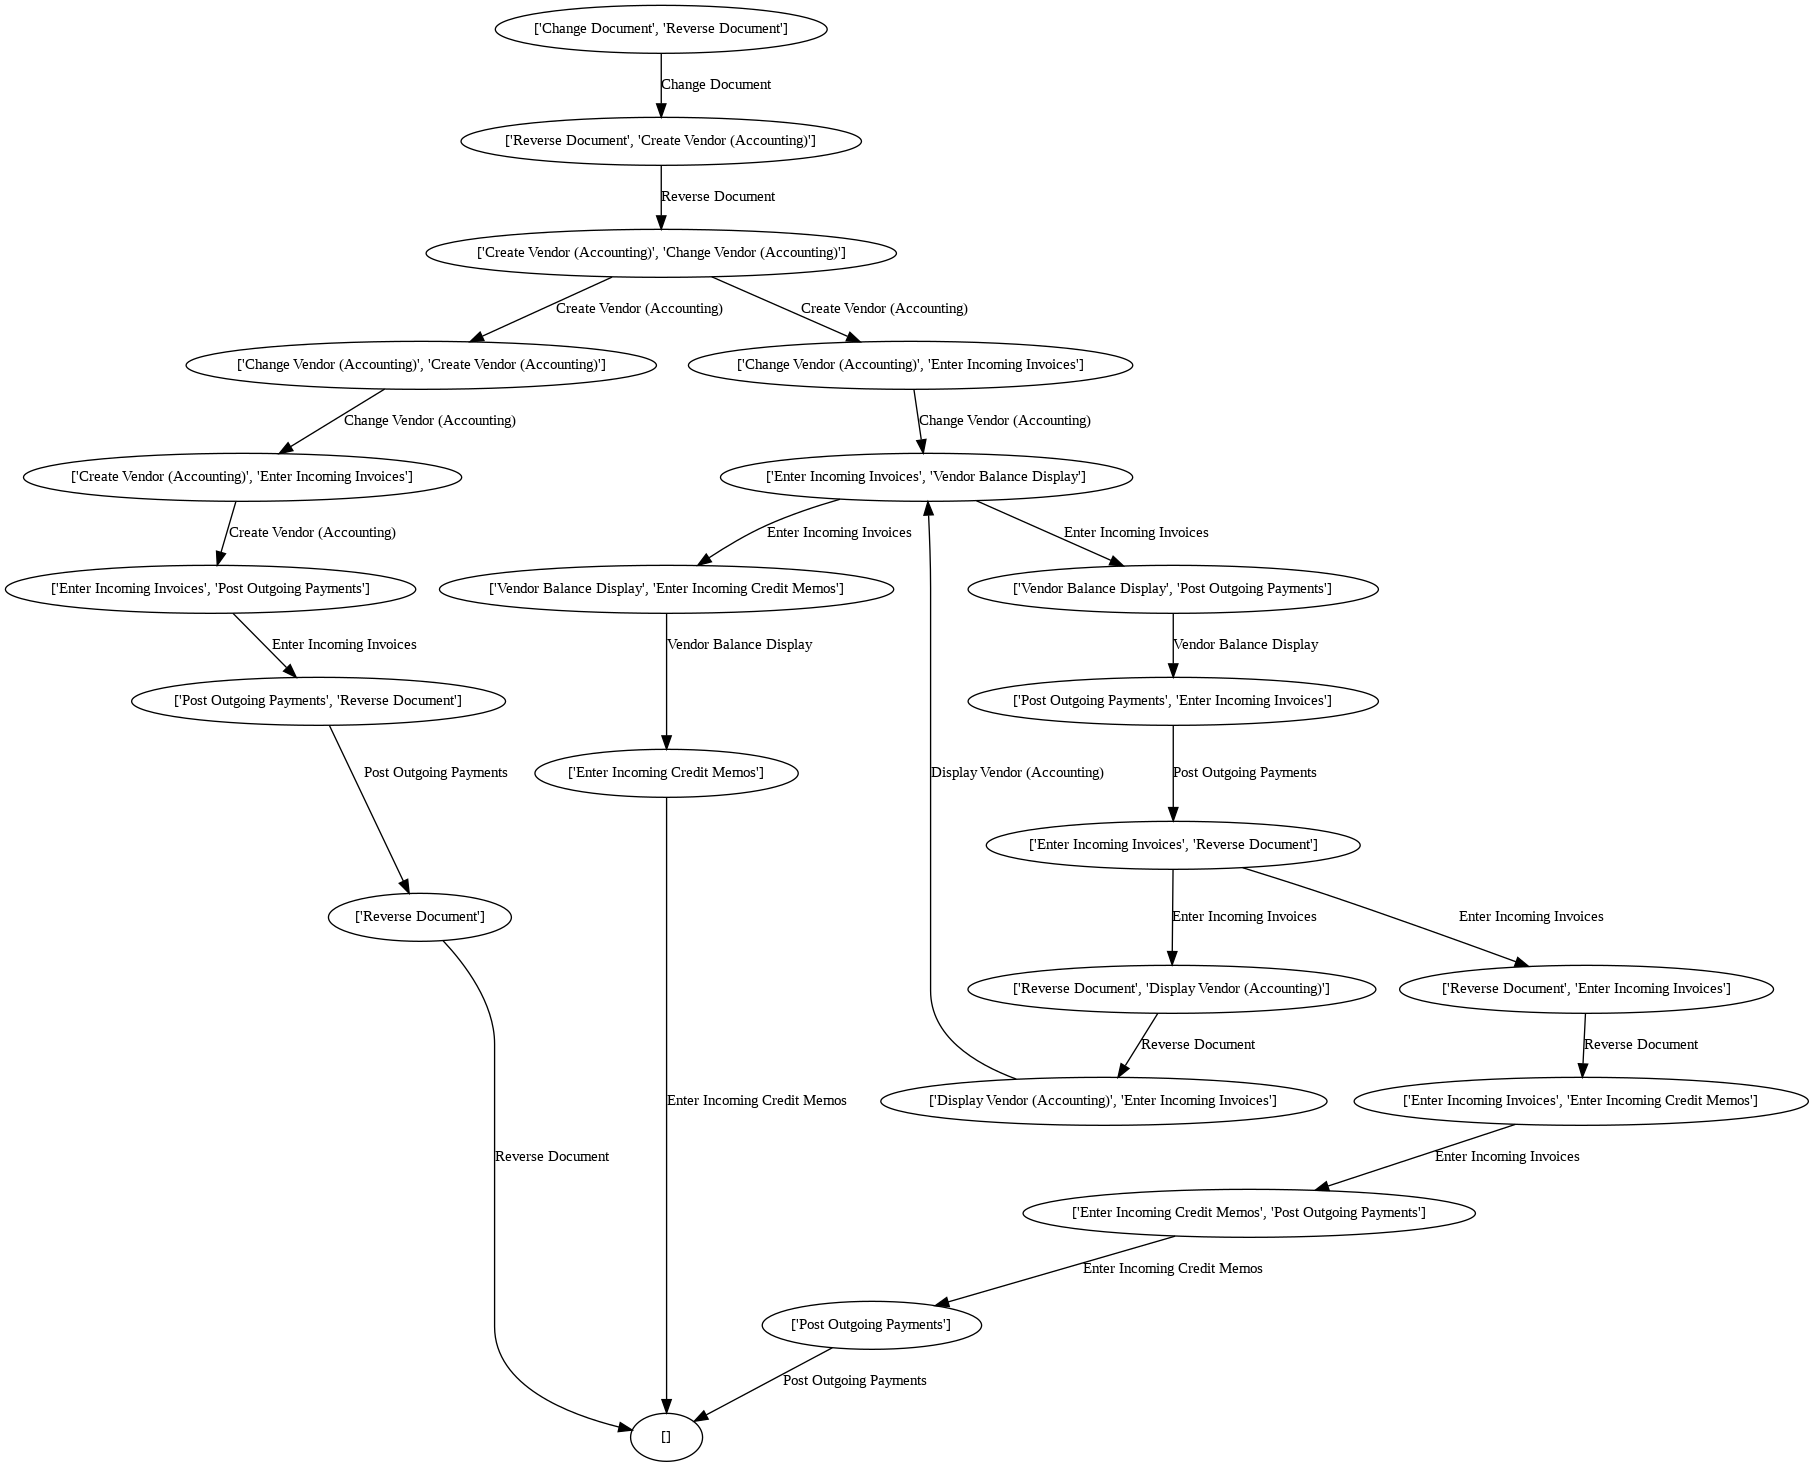

In [51]:
transition_system = pm4py.discover_transition_system(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_transition_system(transition_system)



In [52]:

case_duration = pm4py.get_all_case_durations(log)
print(case_duration)

[3540.0, 4020.0, 4320.0]


In [53]:
pm4py.get_start_activities(log)

{'Change Document': 3}

In [54]:
pm4py.get_end_activities(log)

{'Post Outgoing Payments': 1,
 'Reverse Document': 1,
 'Enter Incoming Credit Memos': 1}

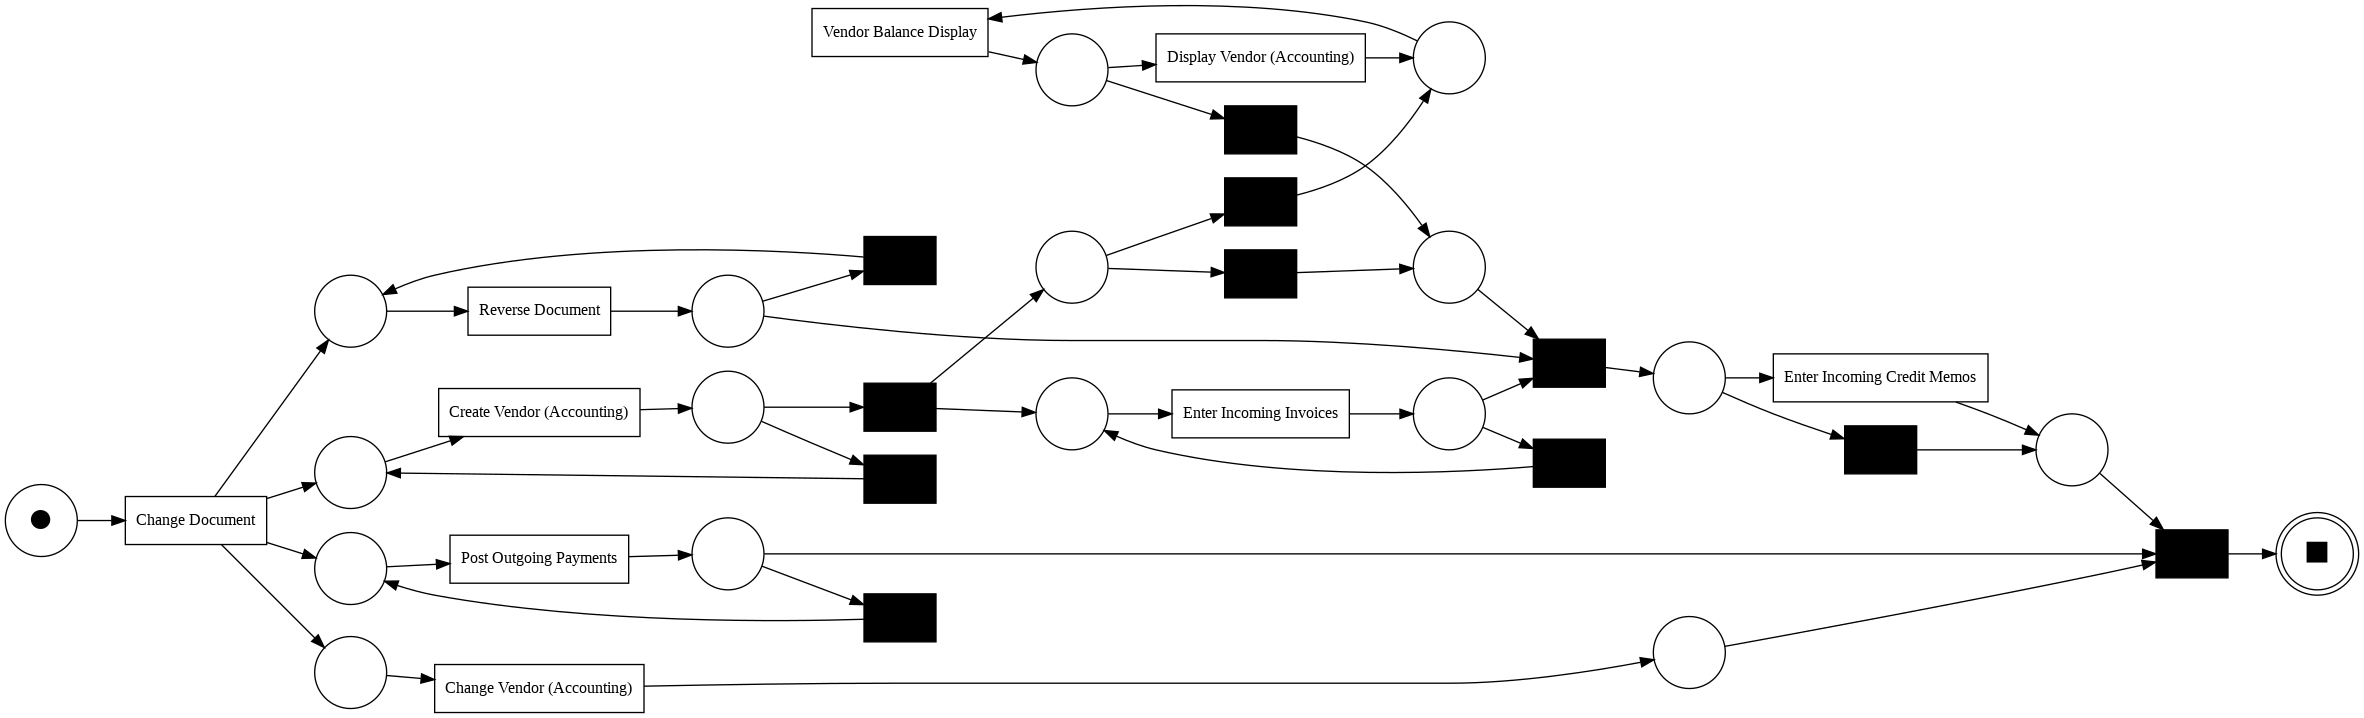

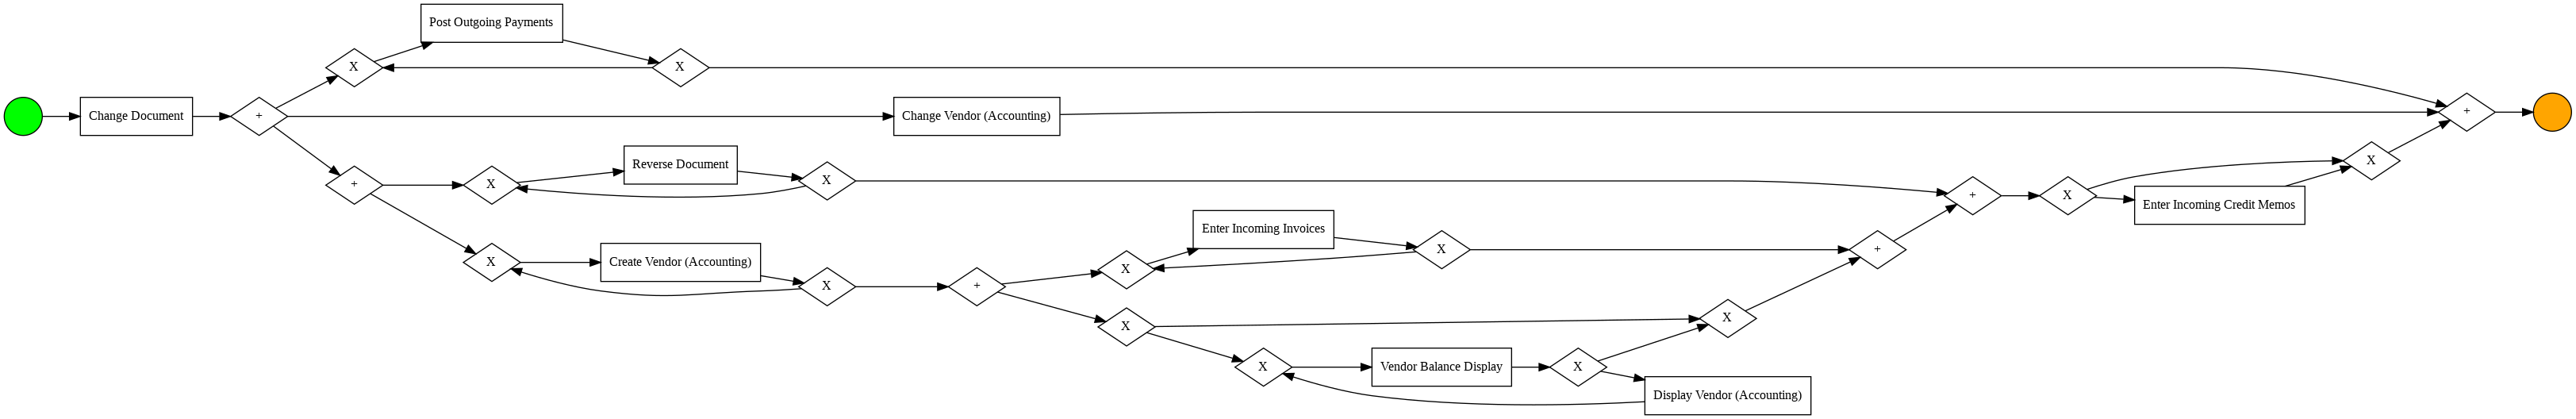

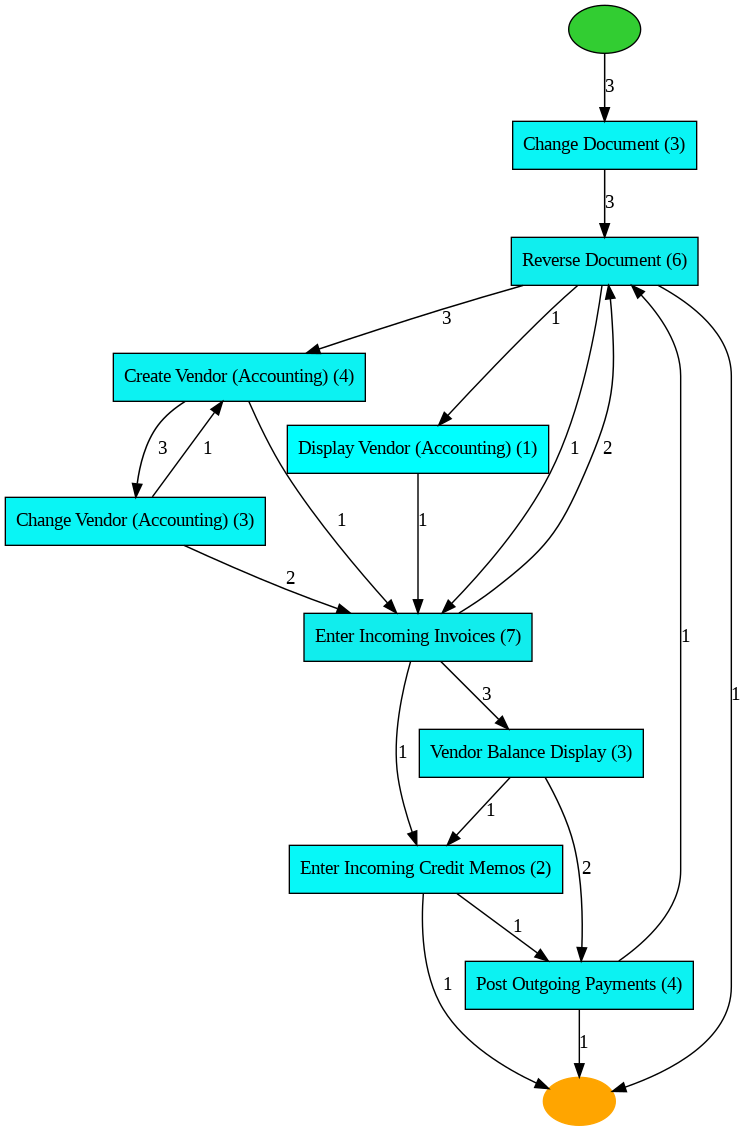

In [55]:
filt_log = pm4py.filter_start_activities(log, {'Change Document'})
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(filt_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

bpmn_model = pm4py.discover_bpmn_inductive(filt_log)
pm4py.view_bpmn(bpmn_model)

map = pm4py.discover_heuristics_net(filt_log)
pm4py.view_heuristics_net(map)

In [60]:
filtered_log = pm4py.filter_trace_attribute_values(
    log,
    'User',
    ['GBIALL-001', 'GBIALL-002'],
    case_id_key='case:concept:name'
)
map = pm4py.discover_heuristics_net(filtered_log)
pm4py.view_heuristics_net(map)


{'Change Document': (node:Change Document connections:{Reverse Document:[0.6666666666666666]}), 'Reverse Document': (node:Reverse Document connections:{Create Vendor (Accounting):[0.6666666666666666], Enter Incoming Invoices:[0]}), 'Change Vendor (Accounting)': (node:Change Vendor (Accounting) connections:{Enter Incoming Invoices:[0.5], Create Vendor (Accounting):[0]}), 'Enter Incoming Invoices': (node:Enter Incoming Invoices connections:{Enter Incoming Credit Memos:[0.5], Vendor Balance Display:[0.5], Reverse Document:[0]}), 'Create Vendor (Accounting)': (node:Create Vendor (Accounting) connections:{Enter Incoming Invoices:[0.5], Change Vendor (Accounting):[0]}), 'Enter Incoming Credit Memos': (node:Enter Incoming Credit Memos connections:{Post Outgoing Payments:[0.5]}), 'Post Outgoing Payments': (node:Post Outgoing Payments connections:{Reverse Document:[0.5]}), 'Vendor Balance Display': (node:Vendor Balance Display connections:{Post Outgoing Payments:[0.5]})}

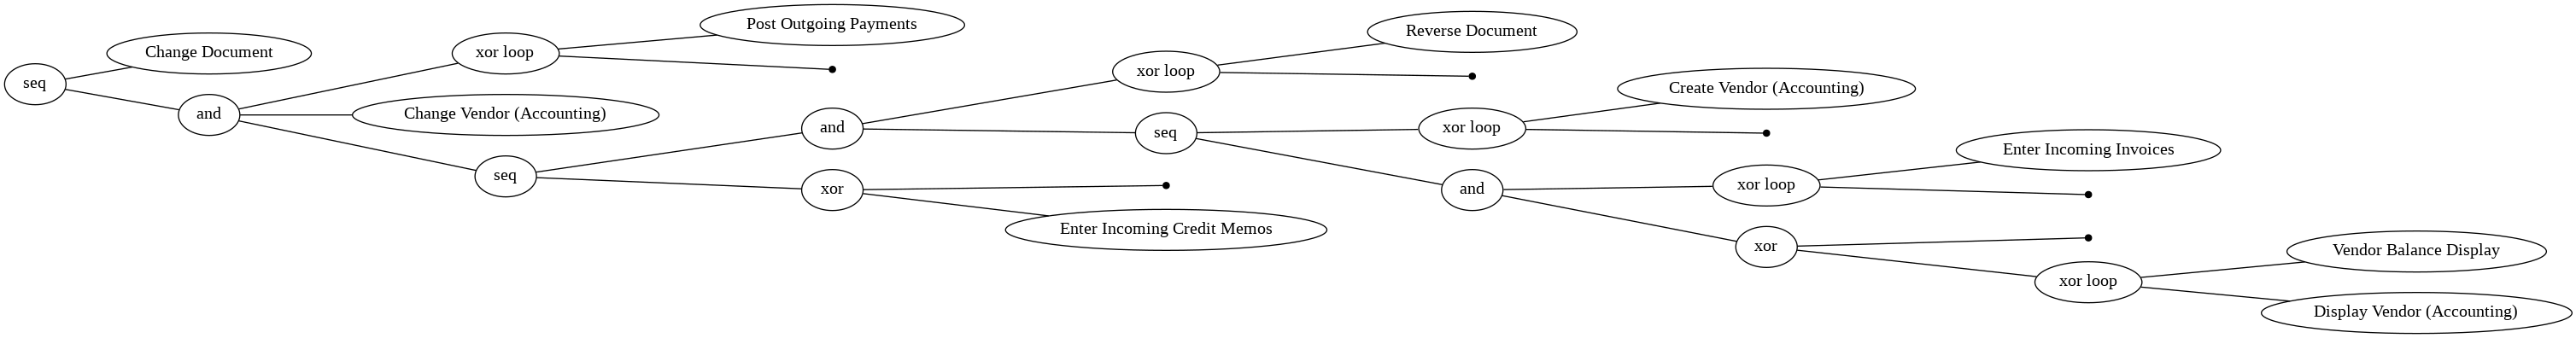

In [57]:
process_tree = pm4py.discover_process_tree_inductive(log)
pm4py.view_process_tree(process_tree)

# Új szakasz

In [79]:


dfg = pm4py.discover_dfg(log)
#dfg

#pm4py.view_dfg(dfg[0], dfg[1], dfg[2])
for df in dfg:
  print(df)
  print('\n')


{('Change Document', 'Reverse Document'): 3, ('Change Vendor (Accounting)', 'Create Vendor (Accounting)'): 1, ('Change Vendor (Accounting)', 'Enter Incoming Invoices'): 2, ('Create Vendor (Accounting)', 'Change Vendor (Accounting)'): 3, ('Create Vendor (Accounting)', 'Enter Incoming Invoices'): 1, ('Display Vendor (Accounting)', 'Enter Incoming Invoices'): 1, ('Enter Incoming Credit Memos', 'Post Outgoing Payments'): 1, ('Enter Incoming Invoices', 'Enter Incoming Credit Memos'): 1, ('Enter Incoming Invoices', 'Post Outgoing Payments'): 1, ('Enter Incoming Invoices', 'Reverse Document'): 2, ('Enter Incoming Invoices', 'Vendor Balance Display'): 3, ('Post Outgoing Payments', 'Enter Incoming Invoices'): 2, ('Post Outgoing Payments', 'Reverse Document'): 1, ('Reverse Document', 'Create Vendor (Accounting)'): 3, ('Reverse Document', 'Display Vendor (Accounting)'): 1, ('Reverse Document', 'Enter Incoming Invoices'): 1, ('Vendor Balance Display', 'Enter Incoming Credit Memos'): 1, ('Vendor Ba

In [89]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfgcost = dfg_discovery.apply(logcost)
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfgcost, log=logcost, variant=dfg_visualization.Variants.COST)
dfg_visualization.view(gviz)

KeyError: 'time:timestamp'

In [83]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.COST)
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.COST)
dfg_visualization.view(gviz)

AttributeError: COST